## Forecast par simulations MC
Le but de cet exercice est d'extraire les données sur le SP500 du fichier Excel. Puis, de réaliser des simulations de MonteCarlo pour un certain horizon. Ces simulations sont faites en supposant que les rendements du SP500 suivent une loi Normale(0,1). Par la suite, nous pourrons donner un intervalle de confiance à 95% de la valeur du SP500 à l'horizon choisi.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statistics as stat

In [5]:
#Ouvrir excel SPX
SPX=pd.read_excel("Donnees SP500.xlsx",sheet_name="SP500")
#regarder les données

Text(0, 0.5, 'Cours')

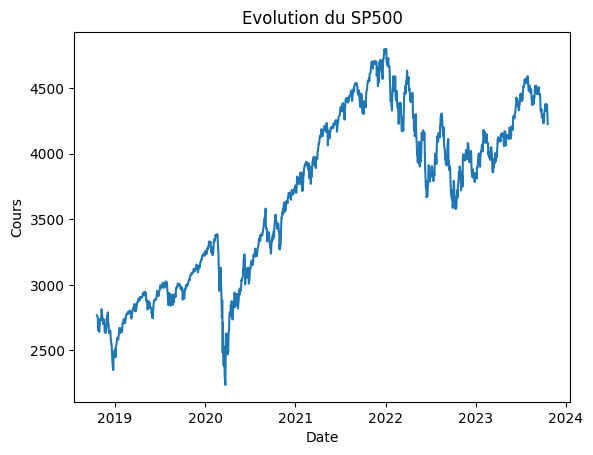

In [6]:
#graph les données
plt.plot(SPX['Date'],SPX['PRICE INDEX'])
plt.title('Evolution du SP500')
plt.xlabel('Date')
plt.ylabel('Cours')

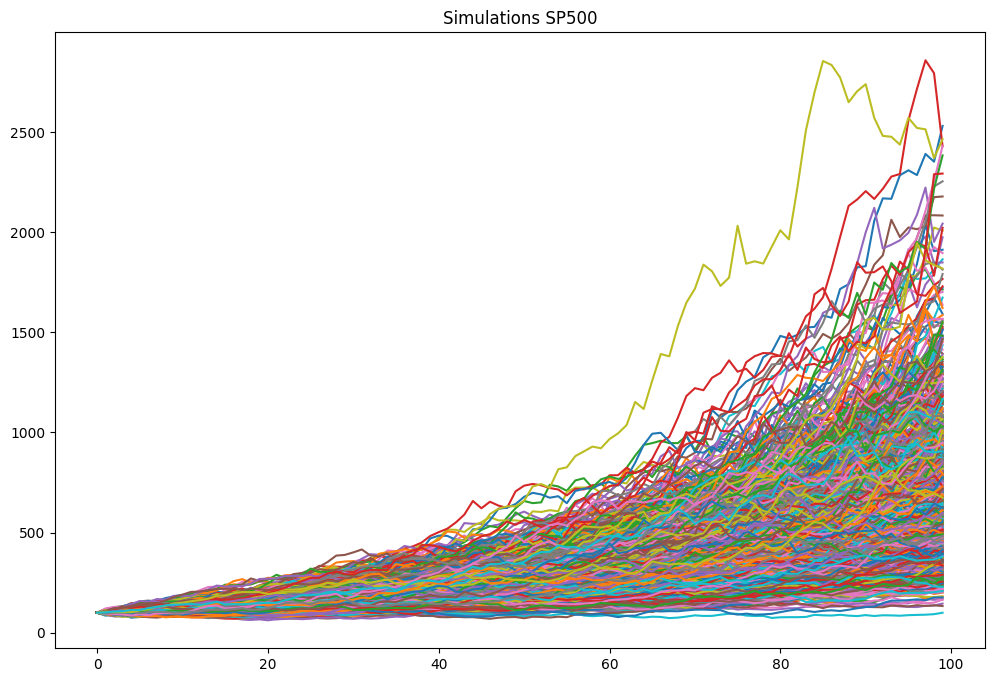

In [7]:
#Simulez 1000 cours d'un actif ayant pour valeur initiale 100.00, v
Vol = 0.05
Mu = 0.02
nb_simulations = 1000
Horizon = 100

temps = np.zeros((Horizon,1))
for i in range(0,Horizon):
    temps[i]=i

Cours = np.zeros((Horizon,nb_simulations))

for i in range(0,nb_simulations):
    Cours[0,i]=100
    for t in range(1,Horizon):
        p=np.random.uniform(0,1)
        while p==0 or p==1:
            p=np.random.uniform(0,1)
        Cours[t,i]=Cours[t-1,i]*(1+stat.NormalDist(mu=Mu,sigma=Vol)).inv_cdf(p)



plt.figure(figsize=(12,8))
plt.plot(Cours)
plt.title("Simulations SP500")
plt.show()

In [8]:
#creer une fonction create_distrib
def create_distrib(vecteur_index,nb_simulations):
   
    #calcul horizon
    horizon = 100
    
    #creer vecteur colonne pour les rend
    rend = np.zeros(len(vecteur_index))

    #boucle pour calculer les rdts
    for i in range(1,len(vecteur_index)):
        rend[i] = (vecteur_index[i] / vecteur_index[i - 1]) - 1

    #calcul esperance et volatilite (historiques) des rendements
    m = np.mean(rend[1:])  
    vol = np.std(rend[1:])

    #initialisation de la proba random
    p=np.random.uniform(0,1)
    
    #PayoffSimul contient les payoffs finaux de toutes les MC i.e. la distribution de X 
    #PayoffSimul aussi leur frequence ce qui donne p(w)

    #definir vecteur PayoffSimul
    PayoffSimul=np.zeros(nb_simulations)
    
    #simulation de MC sur evolution du cours de la date initiale à l'horizon
    for i in range (nb_simulations):
        
        #vecteur de cours simules
        Cours=np.ones(horizon)
        #cours de départ
        Cours[0]=vecteur_index[len(vecteur_index)-1]

        #boucle sur horizon
        for t in range(1,horizon):
            
            #tirage random proba )0,1(
            p=np.random.uniform(0,1)
            
            #gestion erreur 
            while p==0 or p==1:
                p=np.random.uniform(0,1)
                
            #calcul cours en t
            Cours[t] = Cours[t-1]*(1+stat.NormalDist(mu=m,sigma=vol).inv_cdf(p))
            
        #recuperation du cours
        PayoffSimul[i]=Cours[horizon-1]-Cours[0]
        
    #fin fonction
    return PayoffSimul

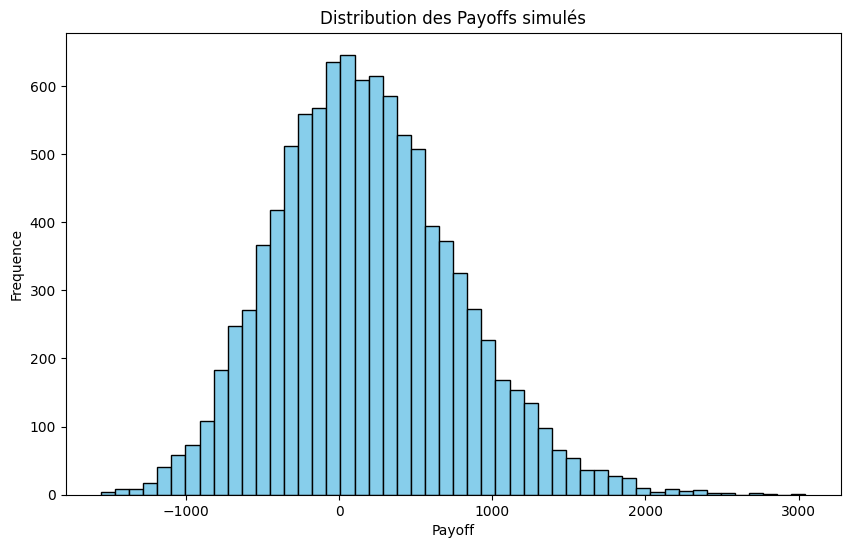

In [9]:
#nombre de simulation 
Nombre_simulations=10000
#appel de la fonction
SPX_distrib=create_distrib(SPX['PRICE INDEX'],Nombre_simulations)

# Visualiser les résultats avec un histogramme
plt.figure(figsize=(10, 6))
plt.hist(SPX_distrib, bins=50, color='skyblue', edgecolor='black')

plt.title("Distribution des Payoffs simulés")
plt.xlabel("Payoff")
plt.ylabel("Frequence")


plt.show()

In [16]:
#print resultat de la fct 
#graph distrib simulees (bar chart)

#print min/max distrib
print(f"Max : {SPX_distrib.max()}")
print(f"Min : {SPX_distrib.min()}")

Max : 3303.1814128990427
Min : -1793.9883356763003


In [18]:
#Intervalle de confiance
SPX_distrib.mean()

print(stat.norm.interval(alpha=0.99,loc=np.mean(SPX_distrib),scale=stat.sem(SPX_distrib)))

AttributeError: module 'statistics' has no attribute 'norm'